In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

In [2]:
numbers=["01","03","05","06"]

# Sum up in one file

In [163]:
for number in numbers:
    folder="dh"+number
    efile = folder+"/e_new"; pfile = folder+"/p_new"
    e=pd.read_csv(efile,header=None,sep='\s+',names=["density","temperature","energy"],float_precision='round_trip')
    p=pd.read_csv(pfile,header=None,sep='\s+',names=["density","temperature","pression"],float_precision='round_trip')
    data=pd.DataFrame()
    data['density']=e['density']; data['temperature']=e['temperature'];
    data['energy']=e['energy']; data['pression']=p['pression']
    data.to_csv(folder+".csv",float_format='%.16e')

# Search the minimum of the pression along all the files

In [3]:
def minPhysics():
    minsPhysics=[[],[],[],[],[]]
    minimums=[]
    for number in numbers:
        folder="dh"+number
        file=folder+".csv"
        physics=pd.read_csv(file,header=0,float_precision='round_trip')
        i=0
        for col in physics.columns:
            minsPhysics[i].append(np.min(physics[col]))
            i+=1
    for i in range(5):
        minimums.append(min(minsPhysics[i]))
    return minimums

In [4]:
minimums = minPhysics()
for i in range(5):
    print("minimum: ", minimums[i])

minimum:  0
minimum:  200.0
minimum:  1.0000000000000001e-07
minimum:  0.10858503950764958
minimum:  -30.113546234274338


# Data analysis for a folder

In [5]:
number="03"
folder="dh"+number
file=folder+".csv"
dataTrain=pd.read_csv(file,header=0,float_precision='round_trip')

In [6]:
number="06"
folder="dh"+number
file=folder+".csv"
dataTest=pd.read_csv(file,header=0,float_precision='round_trip')

In [7]:
dataTrain.head()

,Unnamed: 0,density,temperature,energy,pression
0,0,200.0,1.000000e-07,2.139284,7.744161e-144
1,1,200.0,1.391643e-07,2.139284,7.744161e-144
2,2,200.0,1.936670e-07,2.139284,7.744161e-144
3,3,200.0,2.695153e-07,2.139284,7.744161e-144
4,4,200.0,3.750691e-07,2.139284,7.744161e-144


In [7]:
dataTrain.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
dataTest.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [9]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145530 entries, 0 to 145529
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           145530 non-null  int64  
 1   density      145530 non-null  float64
 2   temperature  145530 non-null  float64
 3   energy       145530 non-null  float64
 4   pression     145530 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 5.6 MB


In [35]:
dataTrain.shape

(145530, 5)

In [36]:
dataTest.shape

(1001000, 5)

In [296]:
dataTrain.describe()

,ID,density,temperature,energy,pression
count,145530.000000,1.455300e+05,1.455300e+05,145530.000000,145530.000000
mean,72764.500000,2.847823e+05,3.625225e+00,194.251722,586.478064
std,42011.036675,1.169440e+06,2.452918e+00,734.699819,2241.113316
min,0.000000,2.000000e+02,1.000000e-07,0.108585,-29.946526
25%,36382.250000,8.347148e+03,1.431012e+00,14.798266,0.671952
50%,72764.500000,1.649805e+04,3.593341e+00,24.281242,98.867581
75%,109146.750000,2.464895e+04,5.755671e+00,38.546011,362.962151
max,145529.000000,1.000000e+07,7.918000e+00,6341.187300,34165.861542


In [6]:
dataTest.describe()

,Unnamed: 0,density,temperature,energy,pression
count,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06
mean,5.004995e+05,7.239316e+05,3.664411e+00,4.733838e+02,1.305280e+03
std,2.889640e+05,1.758022e+06,2.434116e+00,1.103578e+03,3.435352e+03
min,0.000000e+00,2.000000e+02,1.000000e-07,1.085936e-01,-3.006164e+01
25%,2.502498e+05,1.197959e+04,1.501299e+00,1.909387e+01,7.608600e+00
50%,5.004995e+05,2.371981e+04,3.640199e+00,3.576459e+01,2.048117e+02
75%,7.507492e+05,3.009451e+05,5.779100e+00,2.229445e+02,6.200654e+02
max,1.000999e+06,1.000000e+07,7.918000e+00,6.341187e+03,3.416586e+04


In [8]:
def data_histo(data,bins):
    num_col=[]
    for col in data.columns:
        plt.figure(col, figsize=(5,5))
        plt.title(col)
        if is_numeric_dtype(data[col]):
            plt.hist(data[col],bins=bins)
            num_col.append(col)
    plt.show()

## See the other folders

In [9]:
number="01"
folder="dh"+number
file=folder+".csv"
dataOther=pd.read_csv(file,header=0,float_precision='round_trip')

In [10]:
dataOther.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [12]:
dataOther.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160400 entries, 0 to 160399
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           160400 non-null  int64  
 1   density      160400 non-null  float64
 2   temperature  160400 non-null  float64
 3   energy       160400 non-null  float64
 4   pression     160400 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.1 MB


In [87]:
dataOther.describe()

,ID,density,temperature,energy,pression
count,160400.000000,1.604000e+05,1.604000e+05,160400.000000,160400.000000
mean,80199.500000,1.284100e+06,3.587274e+00,828.826449,2163.849479
std,46303.635926,2.199909e+06,2.468249e+00,1378.595687,4360.996479
min,0.000000,2.000000e+02,1.000000e-07,0.108608,-30.113546
25%,40099.750000,2.798792e+04,1.361943e+00,37.994934,41.231597
50%,80199.500000,1.985498e+05,3.547295e+00,155.896143,422.242695
75%,120299.250000,1.409094e+06,5.732648e+00,921.686930,1858.729424
max,160399.000000,1.000000e+07,7.918000e+00,6341.187300,34165.861542


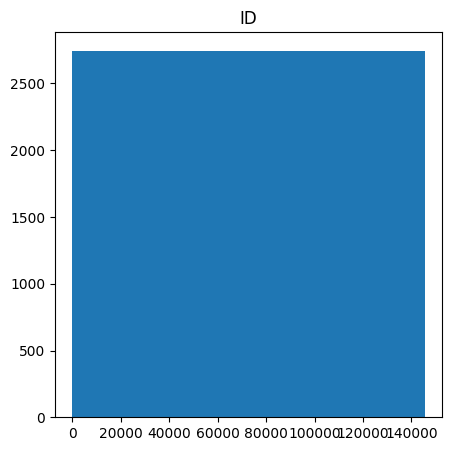

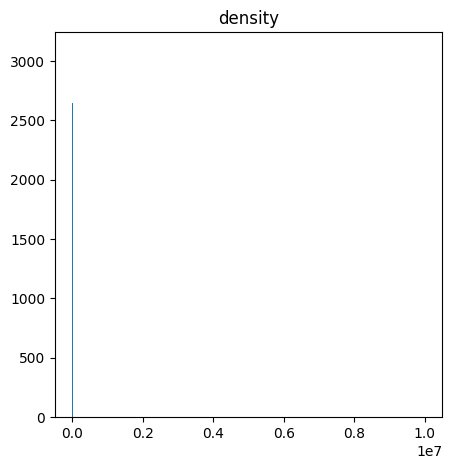

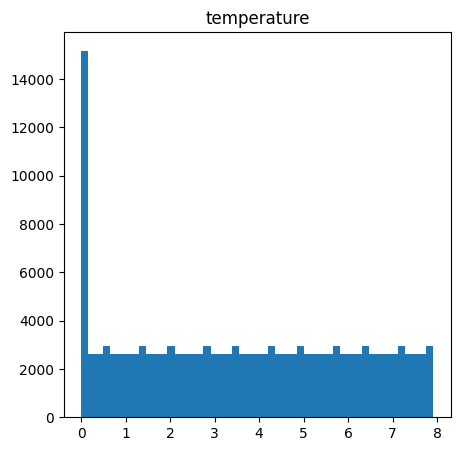

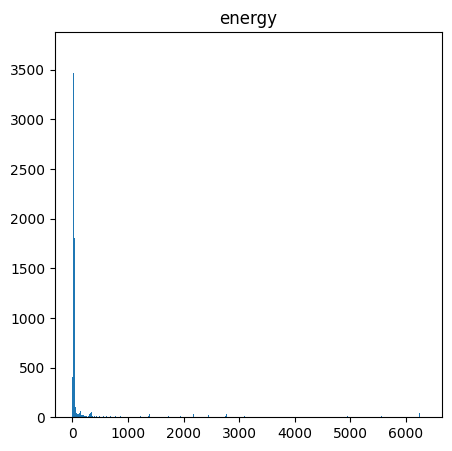

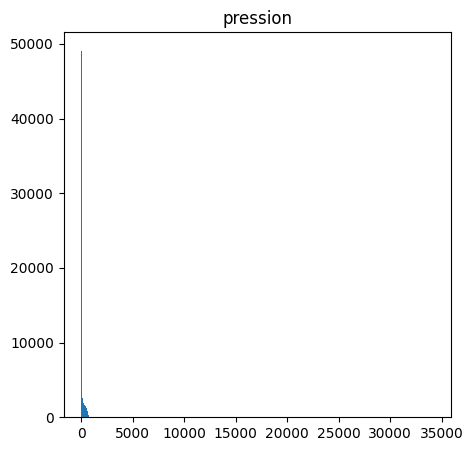

In [89]:
bins='auto'
data_histo(dataTrain,bins)

In [229]:
bornes=[41,1858,10266,20391,27344]
dataRepart = dataTrain

In [506]:
dataTrain.describe()

,ID,density,temperature,energy,pression
count,145530.000000,1.455300e+05,1.455300e+05,145530.000000,145530.000000
mean,72764.500000,2.847823e+05,3.625225e+00,194.251722,586.478064
std,42011.036675,1.169440e+06,2.452918e+00,734.699819,2241.113316
min,0.000000,2.000000e+02,1.000000e-07,0.108585,-29.946526
25%,36382.250000,8.347148e+03,1.431012e+00,14.798266,0.671952
50%,72764.500000,1.649805e+04,3.593341e+00,24.281242,98.867581
75%,109146.750000,2.464895e+04,5.755671e+00,38.546011,362.962151
max,145529.000000,1.000000e+07,7.918000e+00,6341.187300,34165.861542


In [449]:
bornes=[0,0.67,99,363,608,5341,16000,25000]
dataRepart = dataTrain

In [441]:
ex0 = dataRepart[dataRepart['pression']<=bornes[0]]
ex1 = dataRepart[(dataRepart['pression']>bornes[0]) & (dataRepart['pression']<=bornes[1])]
ex2 = dataRepart[(dataRepart['pression']>bornes[1]) & (dataRepart['pression']<=bornes[2])]
ex3 = dataRepart[(dataRepart['pression']>bornes[2]) & (dataRepart['pression']<=bornes[3])]
ex4 = dataRepart[(dataRepart['pression']>bornes[3]) & (dataRepart['pression']<=bornes[4])]
ex5 = dataRepart[(dataRepart['pression']>bornes[4]) & (dataRepart['pression']<=bornes[5])]
ex6 = dataRepart[(dataRepart['pression']>bornes[5]) & (dataRepart['pression']<=bornes[6])]
ex7 = dataRepart[(dataRepart['pression']>bornes[6]) & (dataRepart['pression']<=bornes[7])]
ex8 = dataRepart[(dataRepart['pression']>bornes[7])]

In [ ]:
ex0 = pd.concat([ex0]*20).sort_index()
ex5 = pd.concat([ex5]*2).sort_index()
ex6 = pd.concat([ex6]*7).sort_index()
ex7 = pd.concat([ex7]*31).sort_index()
ex8 = pd.concat([ex8]*104).sort_index()
newTrain = pd.concat([ex0,ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8]).sort_index()

In [660]:
bornes=[0,3390,6809,10229,13648,17068,20488,23907,27327,30746]
dataRepart = dataTrain

In [661]:
ex0 = dataRepart[dataRepart['pression']<=bornes[0]]
ex1 = dataRepart[(dataRepart['pression']>bornes[0]) & (dataRepart['pression']<=bornes[1])]
ex2 = dataRepart[(dataRepart['pression']>bornes[1]) & (dataRepart['pression']<=bornes[2])]
ex3 = dataRepart[(dataRepart['pression']>bornes[2]) & (dataRepart['pression']<=bornes[3])]
ex4 = dataRepart[(dataRepart['pression']>bornes[3]) & (dataRepart['pression']<=bornes[4])]
ex5 = dataRepart[(dataRepart['pression']>bornes[4]) & (dataRepart['pression']<=bornes[5])]
ex6 = dataRepart[(dataRepart['pression']>bornes[5]) & (dataRepart['pression']<=bornes[6])]
ex7 = dataRepart[(dataRepart['pression']>bornes[6]) & (dataRepart['pression']<=bornes[7])]
ex8 = dataRepart[(dataRepart['pression']>bornes[7]) & (dataRepart['pression']<=bornes[8])]
ex9 = dataRepart[(dataRepart['pression']>bornes[8]) & (dataRepart['pression']<=bornes[9])]
ex10 = dataRepart[(dataRepart['pression']>bornes[9])]

In [646]:
ex1.describe()

,Unnamed: 0,density,temperature,energy,pression
count,139277.000000,1.392770e+05,1.392770e+05,139277.000000,1.392770e+05
mean,70561.578818,1.168969e+05,3.566781e+00,88.254861,2.306448e+02
std,40327.152624,6.054716e+05,2.462368e+00,379.339940,4.003329e+02
min,0.000000,2.000000e+02,1.000000e-07,0.108585,7.744161e-144
25%,35735.000000,8.248349e+03,1.332724e+00,14.606442,5.829372e-01
50%,70554.000000,1.595466e+04,3.514711e+00,23.734211,8.724218e+01
75%,105373.000000,2.375976e+04,5.716356e+00,36.711985,3.300223e+02
max,145167.000000,1.000000e+07,7.918000e+00,6265.799778,3.388227e+03


In [662]:
ex0 = pd.concat([ex0]*20).sort_index()
ex1 = pd.concat([ex1]).sort_index()
ex2 = pd.concat([ex2]*15).sort_index()
ex3 = pd.concat([ex3]*30).sort_index()
ex4 = pd.concat([ex4]*30).sort_index()
ex5 = pd.concat([ex5]*60).sort_index()
ex6 = pd.concat([ex6]*60).sort_index()
ex7 = pd.concat([ex7]*60).sort_index()
ex8 = pd.concat([ex8]*90).sort_index()
ex9 = pd.concat([ex9]*90).sort_index()
ex10 = pd.concat([ex10]*90).sort_index()
newTrain = pd.concat([ex0,ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8,ex9,ex10]).sort_index()

In [683]:
bornes=[-27.85,-21.463,-4.165,4.38,177,546,1570,4412,12296]
dataRepart = dataTrain

In [684]:
ex0 = dataRepart[dataRepart['pression']<=bornes[0]]
ex1 = dataRepart[(dataRepart['pression']>bornes[0]) & (dataRepart['pression']<=bornes[1])]
ex2 = dataRepart[(dataRepart['pression']>bornes[1]) & (dataRepart['pression']<=bornes[2])]
ex3 = dataRepart[(dataRepart['pression']>bornes[2]) & (dataRepart['pression']<=bornes[3])]
ex4 = dataRepart[(dataRepart['pression']>bornes[3]) & (dataRepart['pression']<=bornes[4])]
ex5 = dataRepart[(dataRepart['pression']>bornes[4]) & (dataRepart['pression']<=bornes[5])]
ex6 = dataRepart[(dataRepart['pression']>bornes[5]) & (dataRepart['pression']<=bornes[6])]
ex7 = dataRepart[(dataRepart['pression']>bornes[6]) & (dataRepart['pression']<=bornes[7])]
ex8 = dataRepart[(dataRepart['pression']>bornes[7]) & (dataRepart['pression']<=bornes[8])]
ex9 = dataRepart[(dataRepart['pression']>bornes[8])]

In [685]:
ex9.describe()

,Unnamed: 0,density,temperature,energy,pression
count,1473.000000,1.473000e+03,1473.000000,1473.000000,1473.000000
mean,144111.943652,7.292596e+06,6.080854,4616.181864,18762.780388
std,1014.239433,1.886844e+06,1.255370,1166.398926,5183.178173
min,141549.000000,3.477628e+06,2.944643,2267.811800,12305.261053
25%,143290.000000,5.561057e+06,5.165944,3559.144593,14510.260532
50%,144176.000000,7.032251e+06,6.266767,4478.444309,17441.161563
75%,144974.000000,8.892655e+06,7.151356,5605.679790,21937.351659
max,145529.000000,1.000000e+07,7.918000,6341.187300,34165.861542


In [686]:
ex0 = pd.concat([ex0]*1060).sort_index()
ex1 = pd.concat([ex1]*71).sort_index()
ex2 = pd.concat([ex2]*19).sort_index()
ex3 = pd.concat([ex3]).sort_index()
ex4 = pd.concat([ex4]).sort_index()
ex5 = pd.concat([ex5]).sort_index()
ex6 = pd.concat([ex6]).sort_index()
ex7 = pd.concat([ex7]*3).sort_index()
ex8 = pd.concat([ex8]*3).sort_index()
ex9 = pd.concat([ex9]*7).sort_index()
newTrain = pd.concat([ex0,ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8,ex9]).sort_index()

In [556]:
bornes=[0,3390]
dataRepart = dataTrain

In [557]:
ex0 = dataRepart[dataRepart['pression']<=bornes[0]]
ex1 = dataRepart[dataRepart['pression']>bornes[0] & dataRepart['pression']>bornes[1]]
ex2 = dataRepart[dataRepart['pression']>bornes[1]]

In [ ]:
ex0.describe()

In [558]:
ex1 = pd.concat([ex1]*26).sort_index()
newTrain = pd.concat([ex0,ex1]).sort_index()

In [687]:
newTrain.describe()

,Unnamed: 0,density,temperature,energy,pression
count,207280.000000,2.072800e+05,2.072800e+05,207280.000000,207280.000000
mean,66848.487293,6.984075e+05,3.732908e+00,453.392097,1521.679489
std,51556.273080,1.959820e+06,2.217216e+00,1233.370495,4431.281788
min,0.000000,2.000000e+02,1.000000e-07,0.108585,-29.946526
25%,12625.750000,3.000909e+03,2.236971e+00,6.482649,0.000021
50%,64427.500000,1.467027e+04,3.357451e+00,22.209431,58.272534
75%,116247.250000,2.622973e+04,5.519780e+00,42.341895,427.073718
max,145529.000000,1.000000e+07,7.918000e+00,6341.187300,34165.861542


In [688]:
i=0
for col in newTrain.columns:
    if(minimums[i]<0):
        newTrain[col] = newTrain[col]-minimums[i]
    i+=1

In [689]:
attributes=["density","energy","pression"]
for atr in attributes:
    newTrain["log_"+atr]=np.log10(newTrain[atr]+1.1)
plt.show()

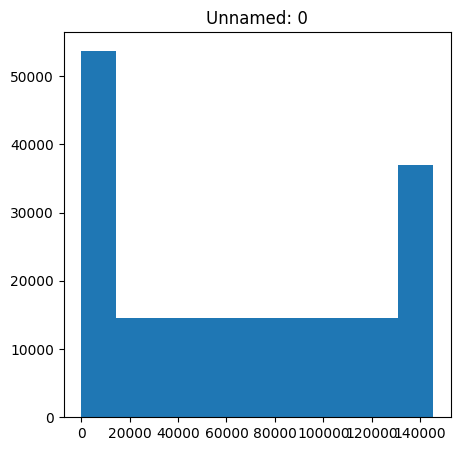

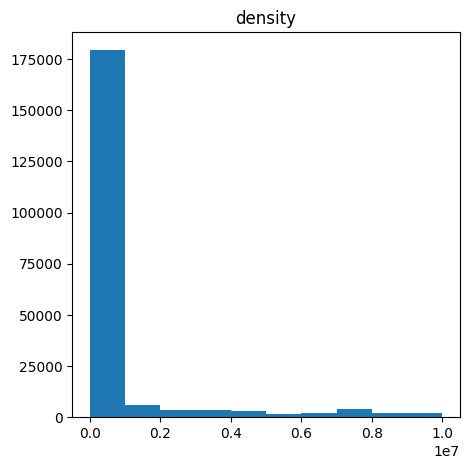

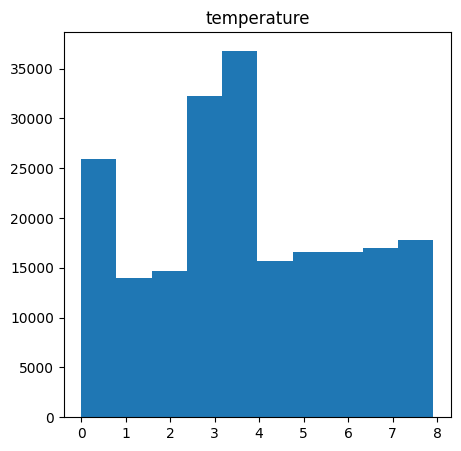

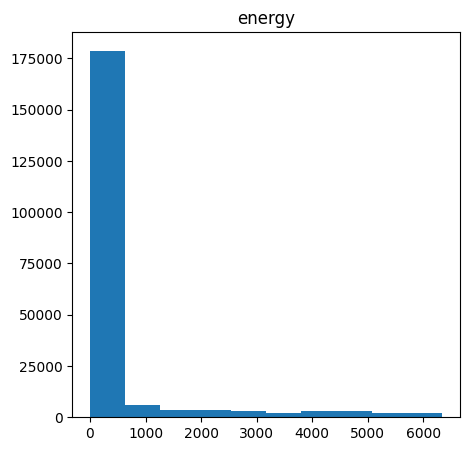

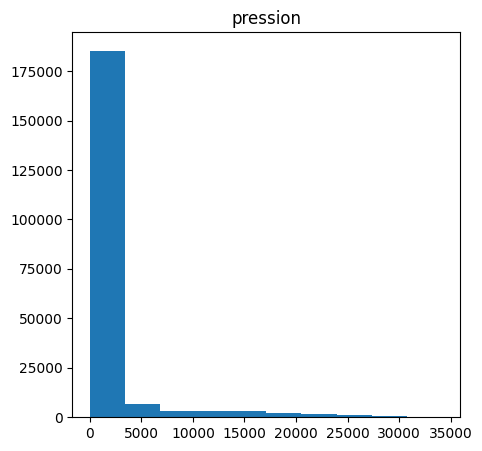

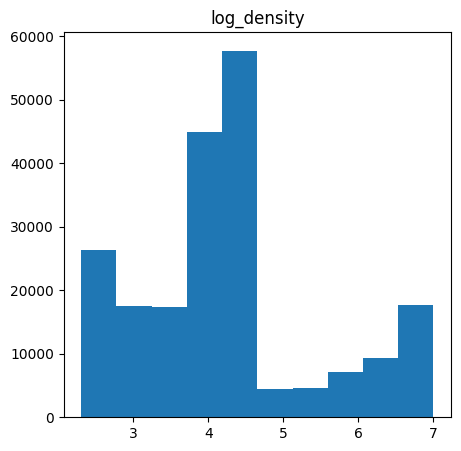

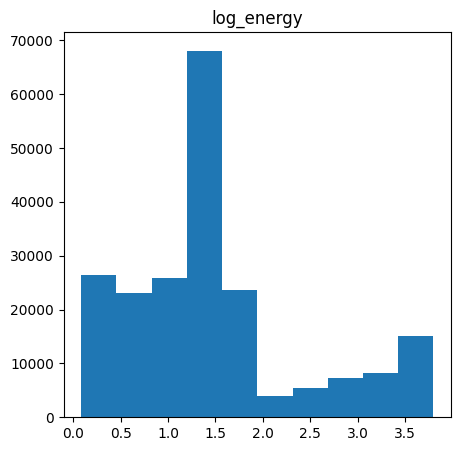

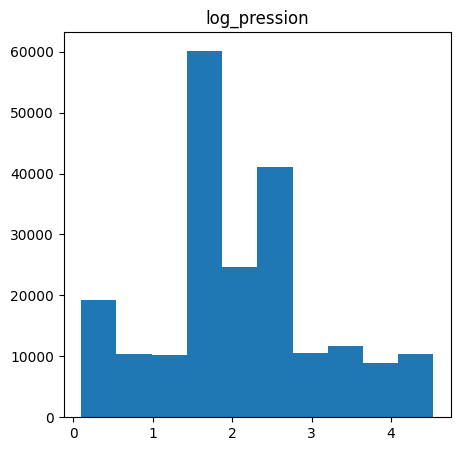

In [690]:
data_histo(newTrain,bins=10)

In [668]:
hist,nb = np.histogram(newTrain['log_pression'],bins=10)

In [669]:
10**(nb)-1.1+minimums[4]

array([-2.99465261e+01, -2.76987183e+01, -2.14630973e+01, -4.16492343e+00,
        4.38217672e+01,  1.76941165e+02,  5.46226352e+02,  1.57065669e+03,
        4.41251862e+03,  1.22960993e+04,  3.41658615e+04])

# Yeo-Johnson mapping

In [30]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [37]:
Y_train=dataTrain[['energy',"pression"]]
X_train=dataTrain[["density","temperature"]]

Y_test=dataTest[['energy',"pression"]]
X_test=dataTest[["density","temperature"]]

In [39]:
transformerX = PowerTransformer(method='yeo-johnson').fit(X_train)
transformerY = PowerTransformer(method='yeo-johnson').fit(Y_train)

In [40]:
X_train_prepared = transformerX.transform(X_train)
X_test_prepared = transformerX.transform(X_test)
Y_train_prepared = transformerY.transform(Y_train)
Y_test_prepared = transformerY.transform(Y_test)

minimum:  -4.123986919829971
maximum:  2.5449841138350404
minimum:  -16.186880146422954
maximum:  5.079857323858601


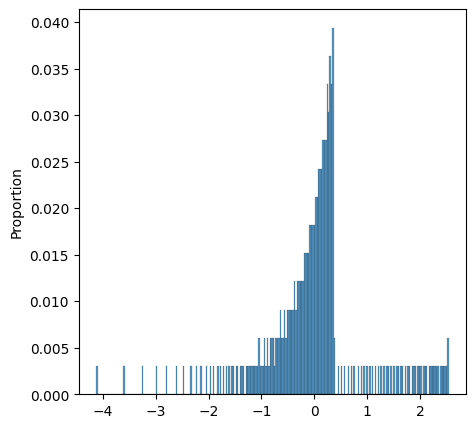

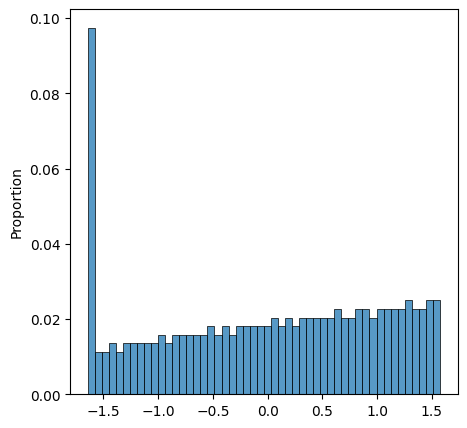

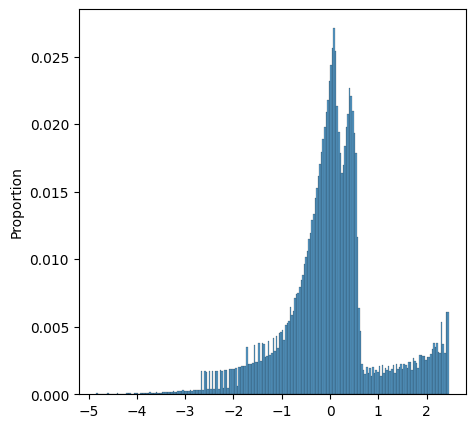

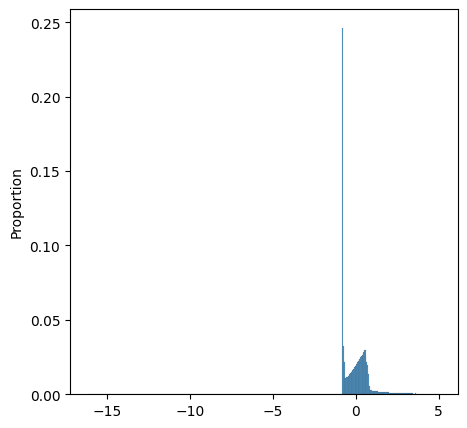

In [41]:
vis=X_train_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_train_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

minimum:  -4.123986919829971
maximum:  2.5449841138350404
minimum:  -16.284226661841643
maximum:  5.079857323858601


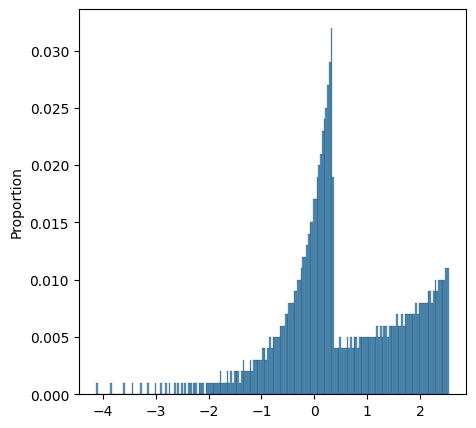

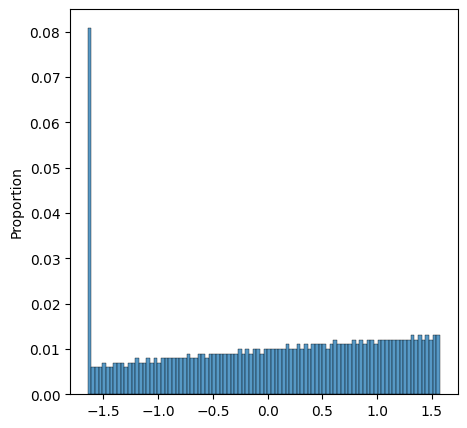

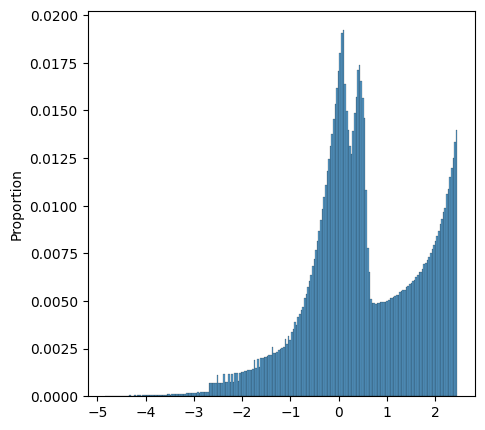

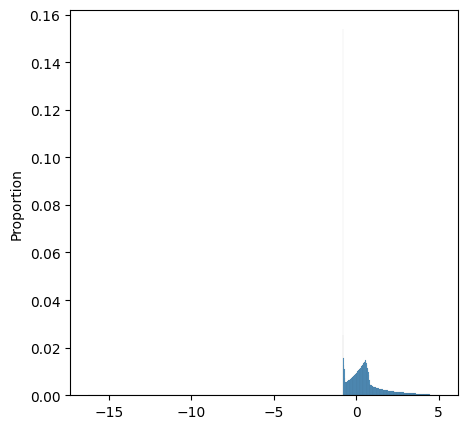

In [42]:
vis=X_test_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_test_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

# Quantile transformation

In [58]:
output_distribution='uniform'
transformerX = QuantileTransformer(random_state=0,output_distribution=output_distribution).fit(X_train)
transformerY = QuantileTransformer(random_state=0,output_distribution=output_distribution).fit(Y_train)

In [59]:
X_train_prepared = transformerX.transform(X_train)
X_test_prepared = transformerX.transform(X_test)
Y_train_prepared = transformerY.transform(Y_train)
Y_test_prepared = transformerY.transform(Y_test)

minimum:  0.0
maximum:  1.0
minimum:  0.0
maximum:  1.0


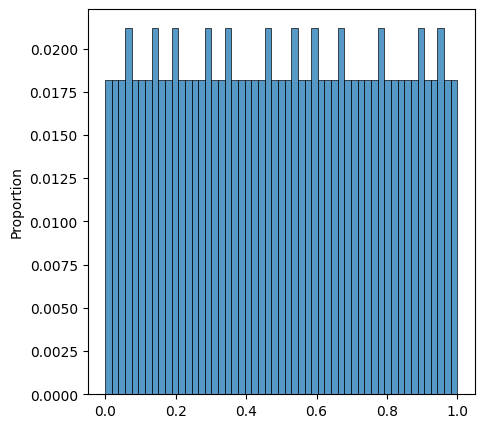

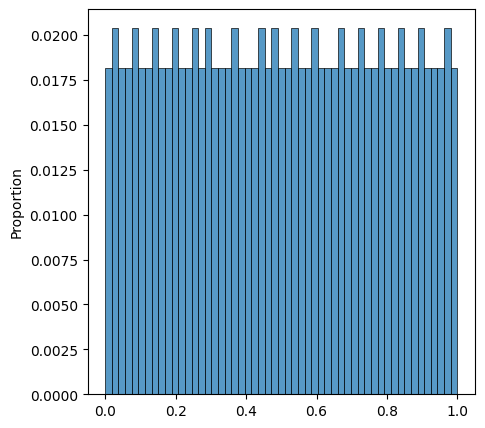

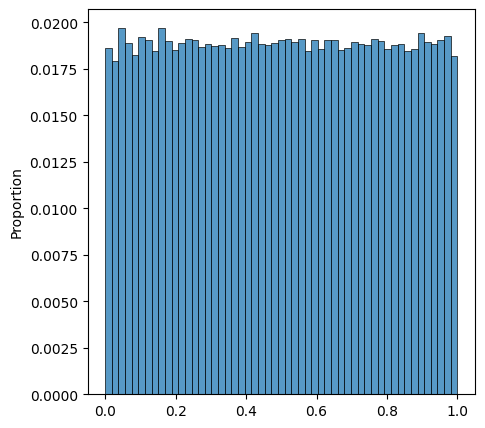

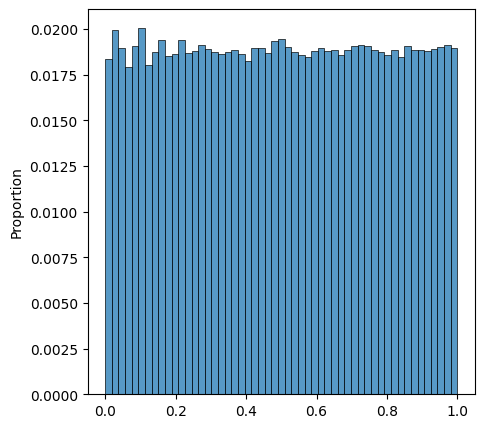

In [60]:
vis=X_train_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_train_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

minimum:  0.0
maximum:  1.0
minimum:  0.0
maximum:  1.0


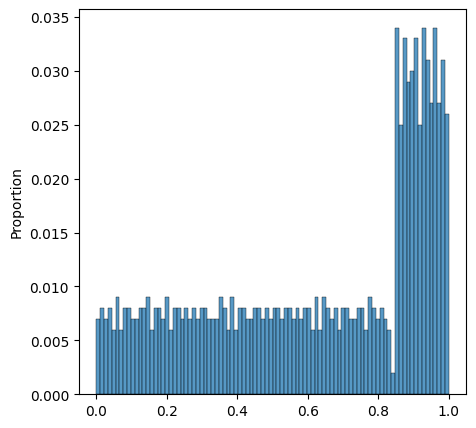

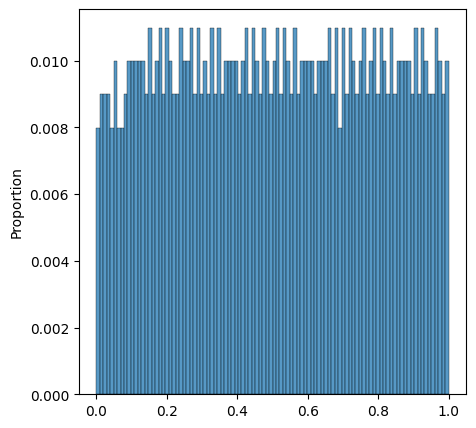

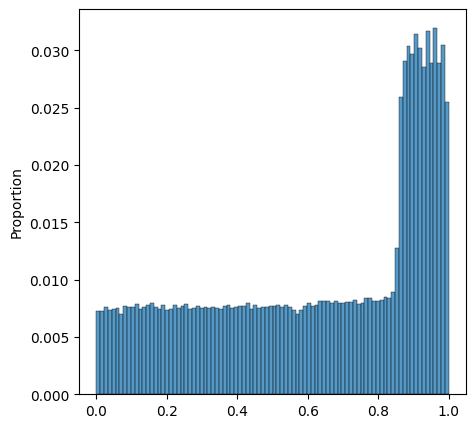

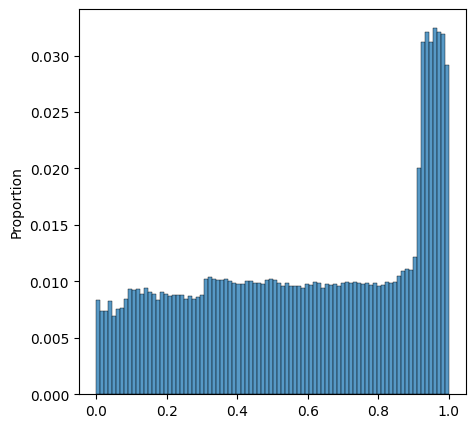

In [61]:
vis=X_test_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_test_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

# Translation in order to have the data positives

In [13]:
i=0
for col in dataTrain.columns:
    if(minimums[i]<0):
        dataTrain[col] = dataTrain[col]-minimums[i]
    i+=1
i=0
for col in dataTest.columns:
    if(minimums[i]<0):
        dataTest[col] = dataTest[col]-minimums[i]
    i+=1
i=0
for col in dataOther.columns:
    if(minimums[i]<0):
        dataOther[col] = dataOther[col]-minimums[i]
    i+=1

In [14]:
dataTrain.describe()

,ID,density,temperature,energy,pression
count,145530.000000,1.455300e+05,1.455300e+05,145530.000000,145530.000000
mean,72764.500000,2.847823e+05,3.625225e+00,194.251722,616.591610
std,42011.036675,1.169440e+06,2.452918e+00,734.699819,2241.113316
min,0.000000,2.000000e+02,1.000000e-07,0.108585,0.167020
25%,36382.250000,8.347148e+03,1.431012e+00,14.798266,30.785498
50%,72764.500000,1.649805e+04,3.593341e+00,24.281242,128.981127
75%,109146.750000,2.464895e+04,5.755671e+00,38.546011,393.075697
max,145529.000000,1.000000e+07,7.918000e+00,6341.187300,34195.975088


In [53]:
bornes=[0,2000]
elapsedTrain = dataTrain.drop(dataTrain[(dataTrain['pression'] < bornes[0]) | (dataTrain['pression'] > bornes[1])].index)
elapsedTest = dataTest.drop(dataTest[(dataTest['pression'] < bornes[0]) | (dataTest['pression'] > bornes[1])].index)

In [85]:
bornes=[30,750]
elapsedOther = dataOther.drop(dataOther[(dataOther['pression'] < bornes[0]) | (dataOther['pression'] > bornes[1])].index)
elapsedTest = dataTest.drop(dataTest[(dataTest['pression'] < bornes[0]) | (dataTest['pression'] > bornes[1])].index)

In [36]:
bornes=[2000,8347]
elapsedTrain = dataTrain.drop(dataTrain[(dataTrain['density'] < bornes[0]) | (dataTrain['density'] > bornes[1])].index)
elapsedTest = dataTest.drop(dataTest[(dataTest['density'] < bornes[0]) | (dataTest['density'] > bornes[1])].index)

In [25]:
bornes=[20000,200000]
elapsedOther = dataOther.drop(dataOther[(dataOther['density'] < bornes[0]) | (dataOther['density'] > bornes[1])].index)
elapsedTest = dataTest.drop(dataTest[(dataTest['density'] < bornes[0]) | (dataTest['density'] > bornes[1])].index)

## Visualisation of the repartition of the data

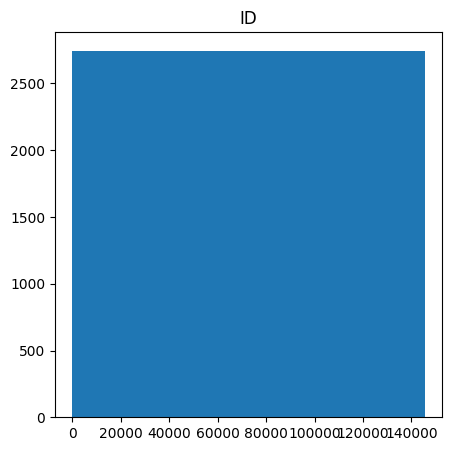

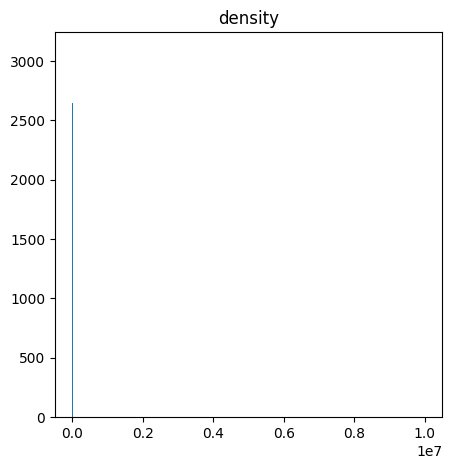

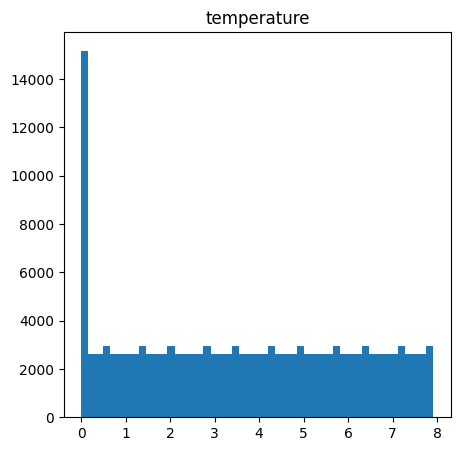

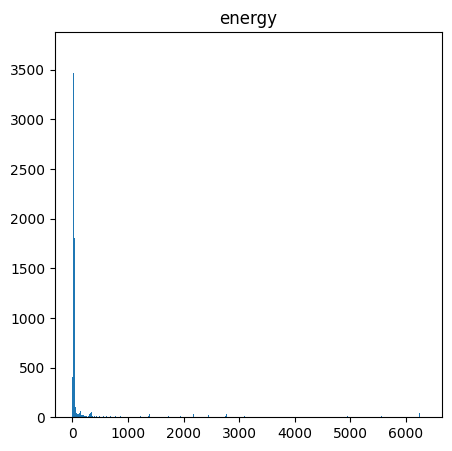

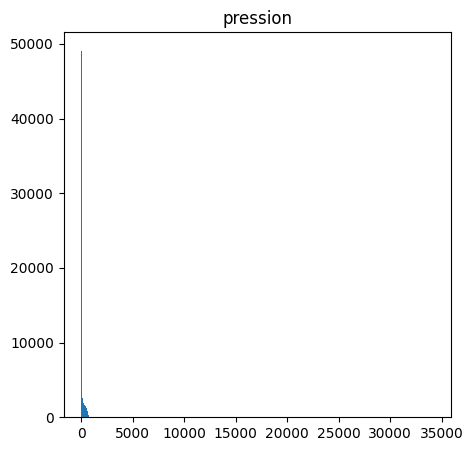

In [26]:
data_histo(dataTrain,bins='auto')

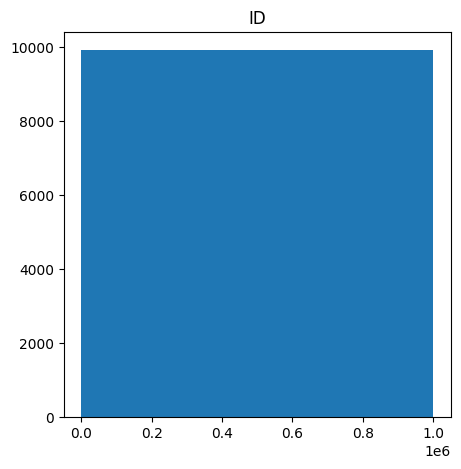

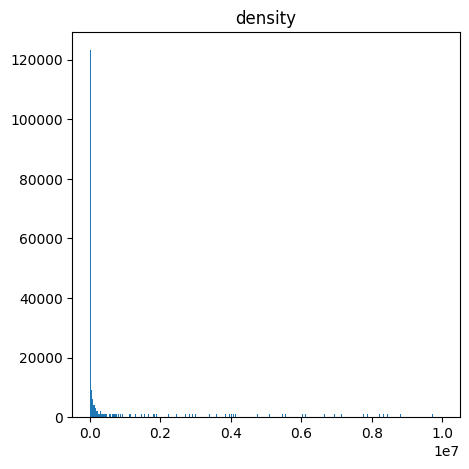

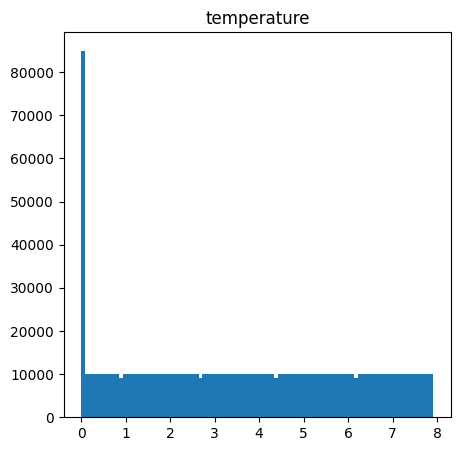

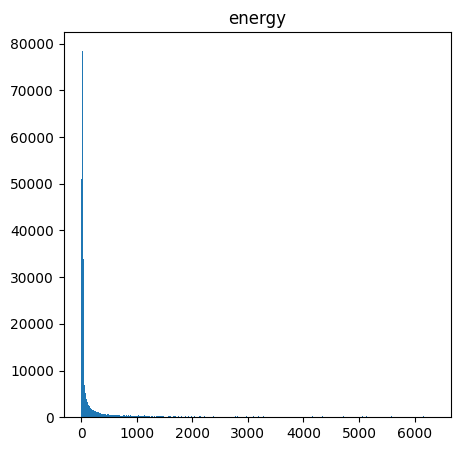

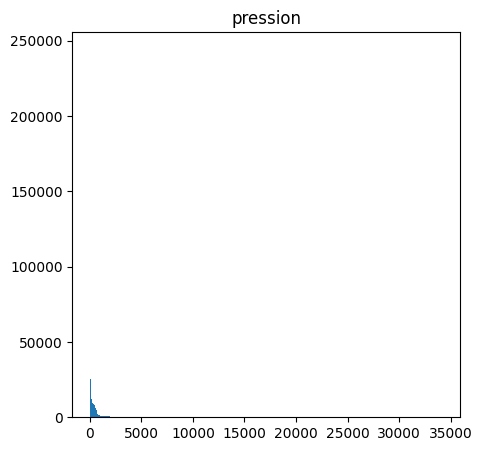

In [27]:
data_histo(dataTest,bins='auto')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3c6bea260>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3c6bea800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3c6be9f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3c6beada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3c6beb070>],
 'means': []}

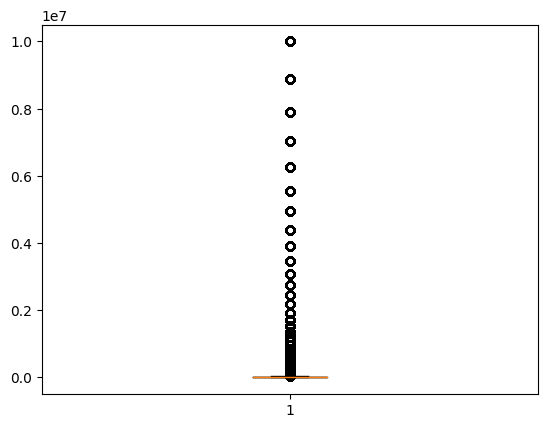

In [11]:
plt.boxplot(dataTrain['density'])

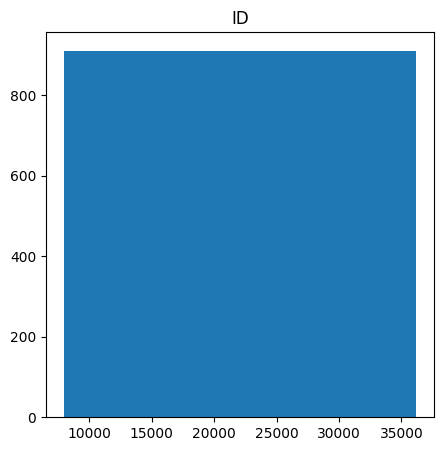

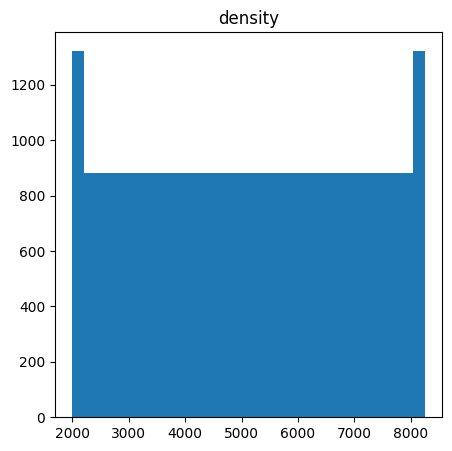

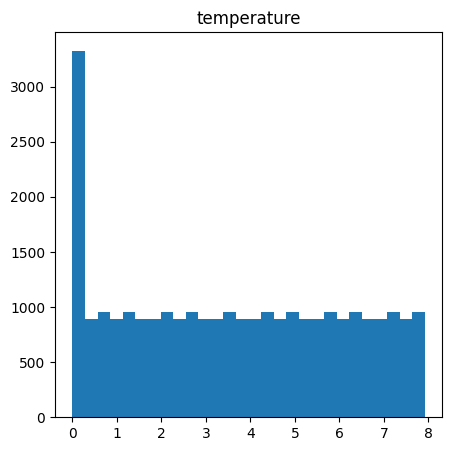

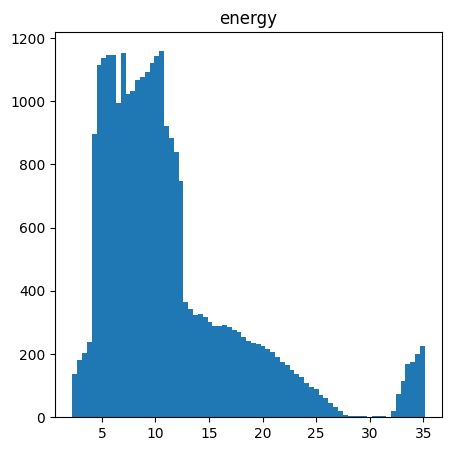

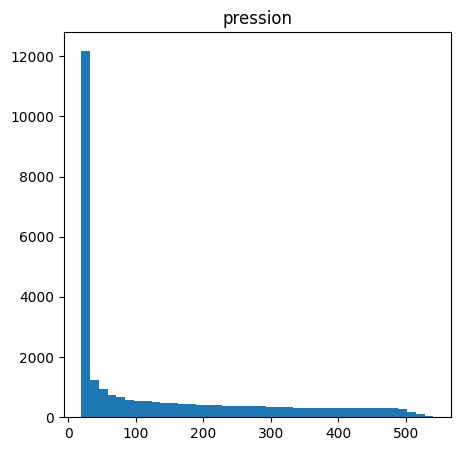

In [37]:
data_histo(elapsedTrain,bins='auto')

In [39]:
elapsedTrain.describe()

,ID,density,temperature,energy,pression
count,28224.000000,28224.000000,2.822400e+04,28224.000000,28224.000000
mean,22049.500000,5132.524048,3.625225e+00,11.348392,141.275991
std,8147.711335,1830.199339,2.452953e+00,6.681502,145.806493
min,7938.000000,2000.584358,1.000000e-07,2.256994,19.543663
25%,14993.750000,3576.095671,1.431012e+00,6.640418,30.113610
50%,22049.500000,5136.186429,3.593341e+00,9.674752,54.879057
75%,29105.250000,6692.267844,5.755671e+00,13.528129,233.191050
max,36161.000000,8248.349258,7.918000e+00,35.143283,540.853224


{'whiskers': [<matplotlib.lines.Line2D at 0x7f55ea6d7760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55ea6d7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55ea6d7160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55ea6d53f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55e7251ed0>],
 'means': []}

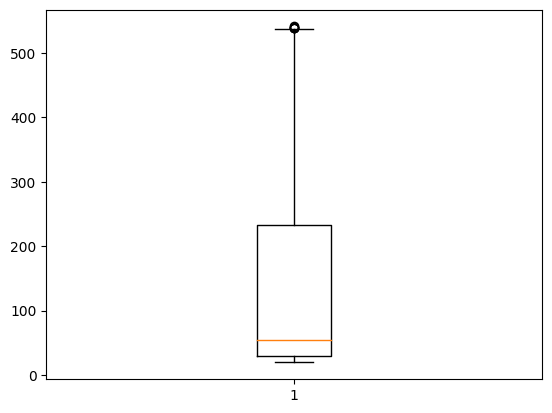

In [38]:
plt.boxplot(elapsedTrain['pression'])

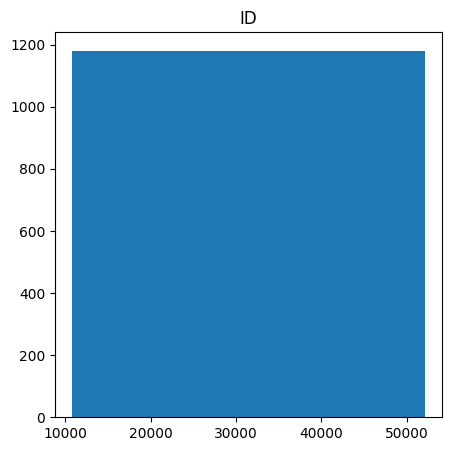

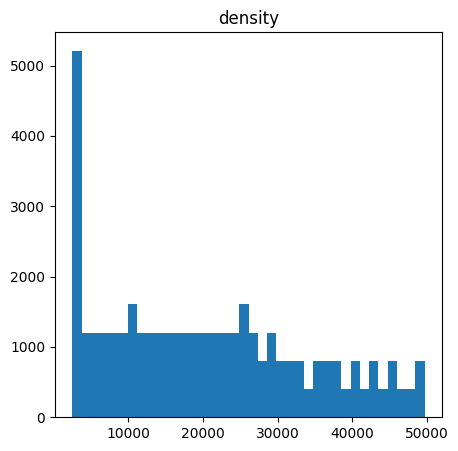

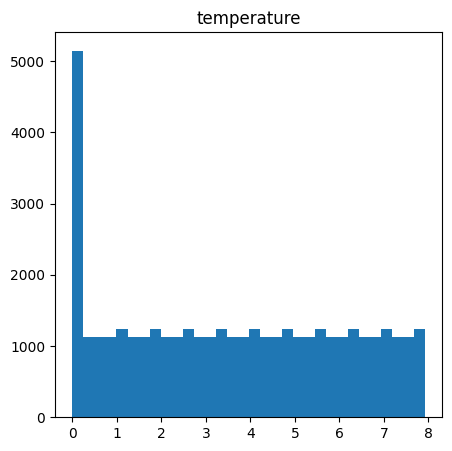

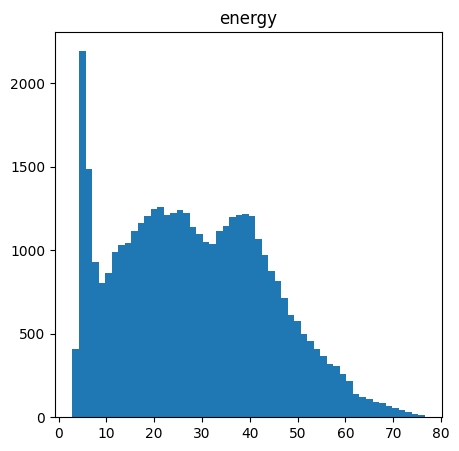

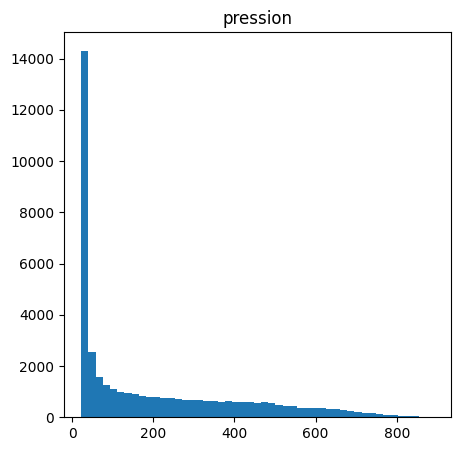

In [18]:
data_histo(elapsedOther,bins='auto')

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5fc95db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5fc96350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5fc95ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5fc968f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5fc96bc0>],
 'means': []}

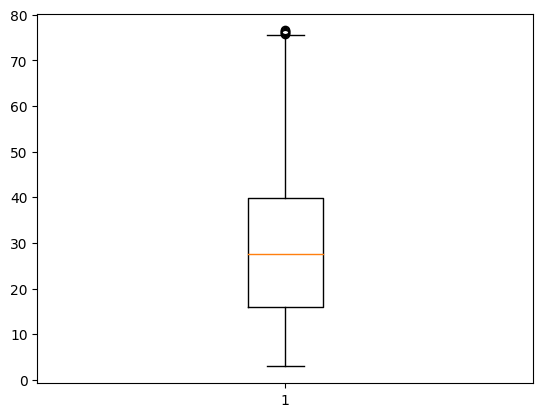

In [15]:
plt.boxplot(elapsedOther['energy'])

In [16]:
elapsedOther.describe()

,ID,density,temperature,energy,pression
count,41303.000000,41303.000000,4.130300e+04,41303.000000,41303.000000
mean,31478.000000,20669.069192,3.587274e+00,28.460706,204.559176
std,11923.293421,13397.816185,2.468271e+00,15.560936,206.895674
min,10827.000000,2552.474681,1.000000e-07,2.911555,22.367182
25%,21152.500000,8823.772204,1.361943e+00,15.906871,31.166321
50%,31478.000000,19275.278646,3.547295e+00,27.476556,108.121423
75%,41803.500000,30411.250195,5.732648e+00,39.862965,341.833454
max,52129.000000,49697.718791,7.918000e+00,76.576891,890.433125


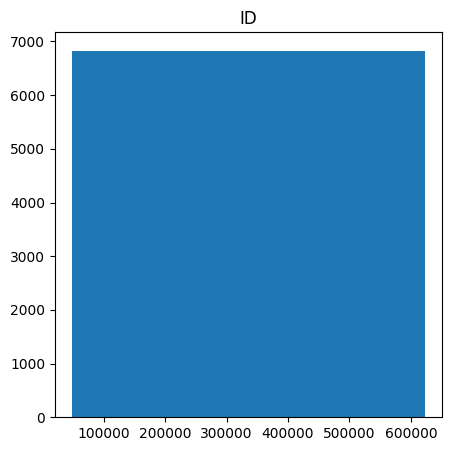

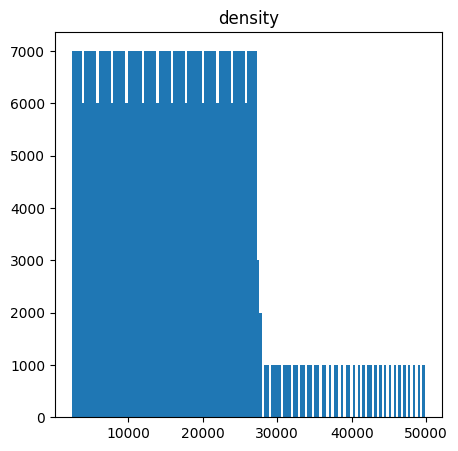

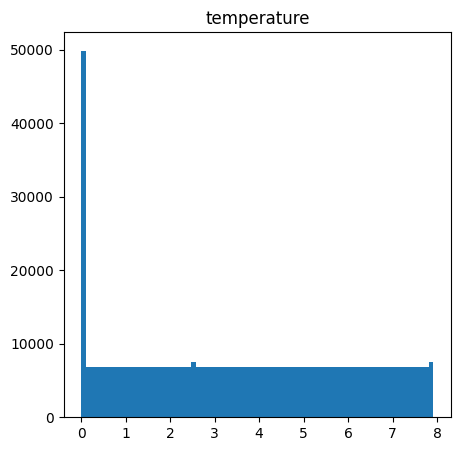

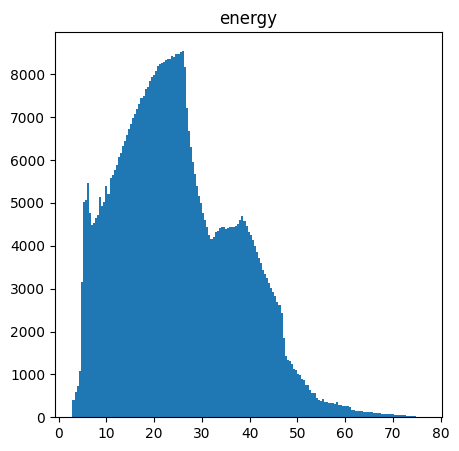

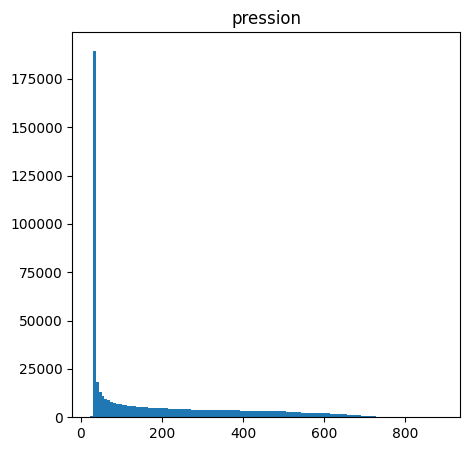

In [19]:
data_histo(elapsedTest,bins='auto')

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5fa77640>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5fa77c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5fa77250>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5fa75c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5fa765c0>],
 'means': []}

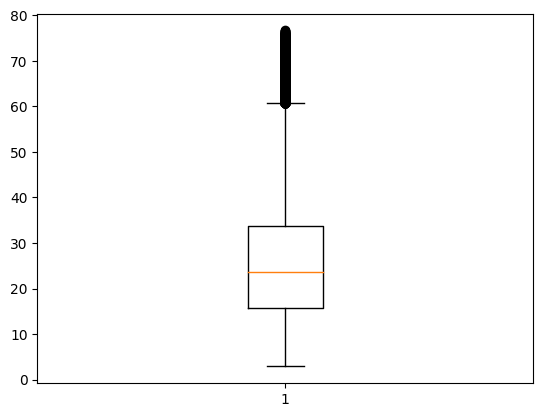

In [21]:
plt.boxplot(elapsedTest['density'])

In [40]:
elapsedTest.describe()

,ID,density,temperature,energy,pression
count,135135.000000,135135.000000,1.351350e+05,135135.000000,135135.000000
mean,105605.000000,5171.905367,3.664411e+00,11.313829,142.534562
std,39010.258651,1836.416450,2.434124e+00,6.532519,146.018474
min,38038.000000,2005.000000,1.000000e-07,2.262255,19.336761
25%,71821.500000,3572.500000,1.501299e+00,6.725332,30.113633
50%,105605.000000,5175.197081,3.640199e+00,9.698677,57.389315
75%,139388.500000,6773.465111,5.779100e+00,13.485416,236.080646
max,173172.000000,8324.725258,7.918000e+00,35.190910,541.494108


## Multi-variate analysis

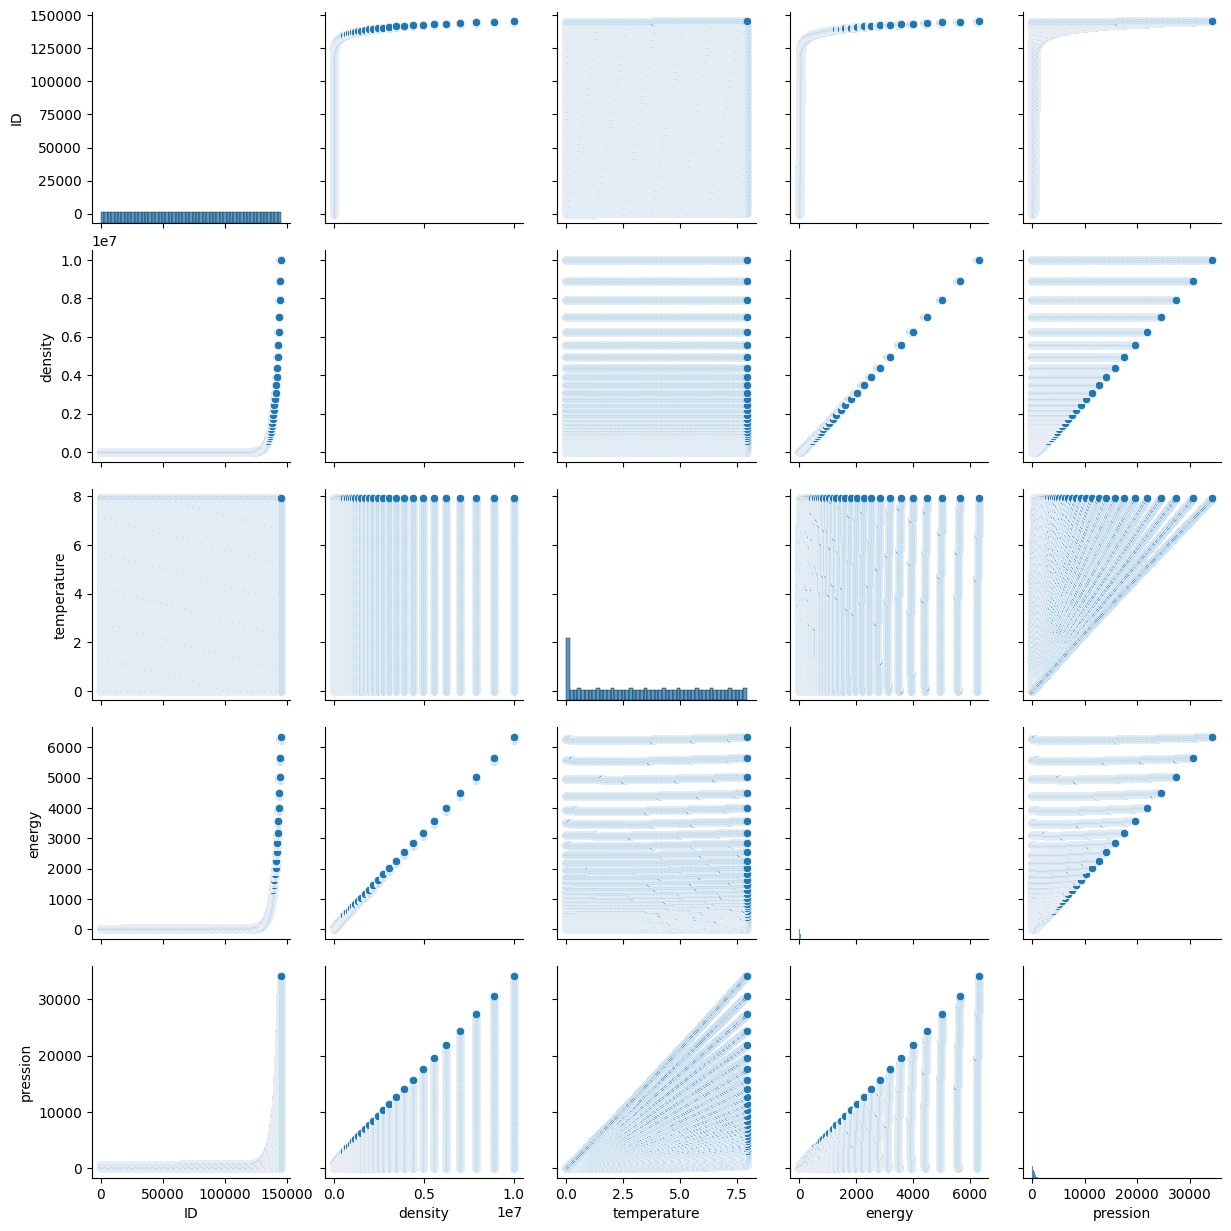

In [15]:
sns.pairplot(dataTrain)
plt.show()

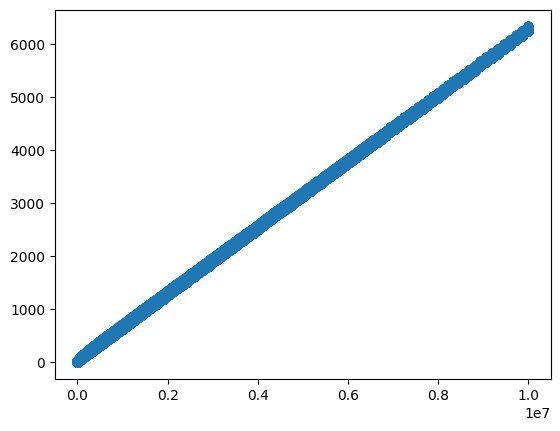

In [21]:
d = dataTest
plt.plot(d['density'],d['energy'],'o')

## Correlation analysis

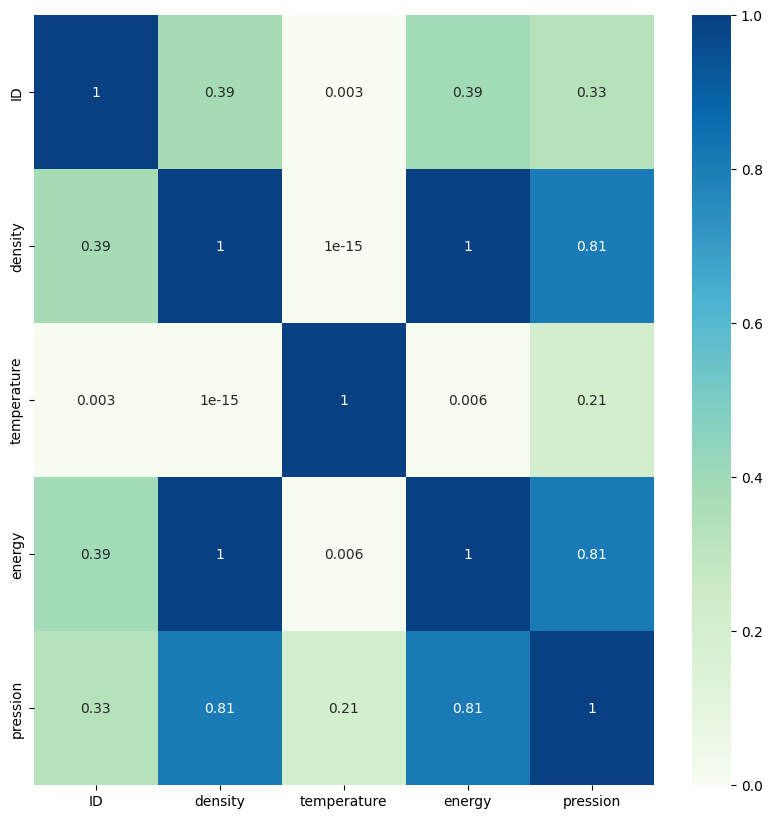

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(dataTrain.corr(), annot=True, cmap="GnBu")
plt.show()

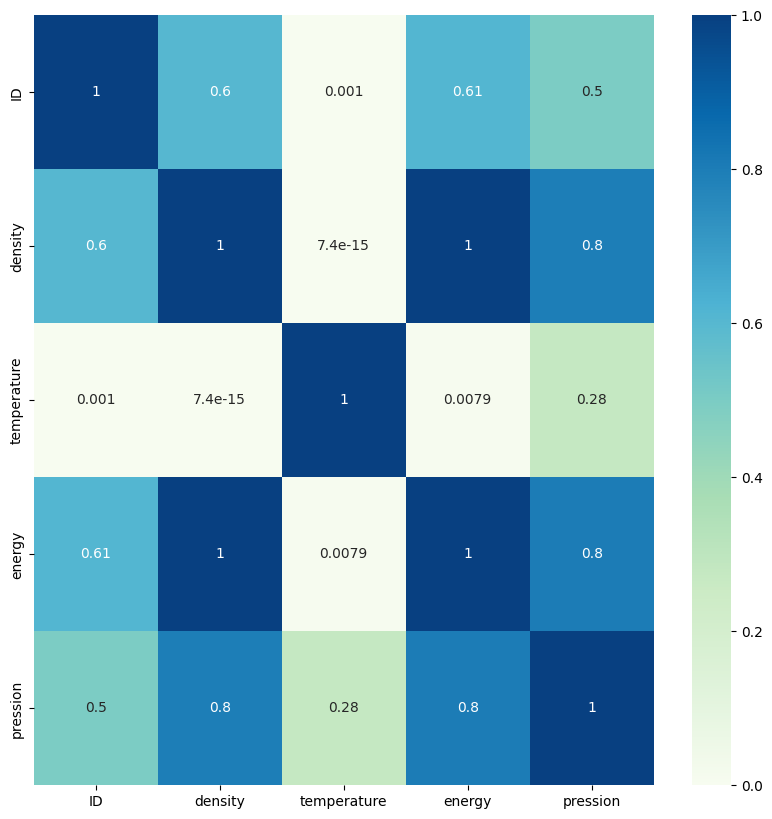

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(dataTest.corr(), annot=True, cmap="GnBu")
plt.show()

In [18]:
X=dataTrain[['density','temperature']]
#VIF DataFrame

vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,density,1.039935
1,temperature,1.039935


In [19]:
X=dataTest[['density','temperature']]
#VIF DataFrame

vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,density,1.111849
1,temperature,1.111849


# Data Transformation

## Log Transform

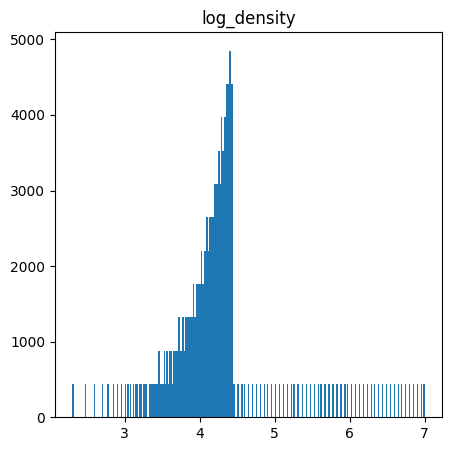

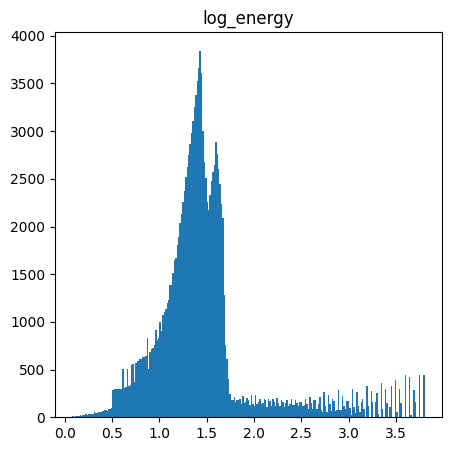

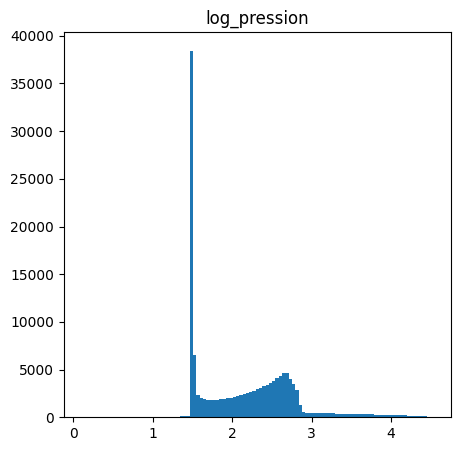

In [626]:
bins='auto'
attributes=["density","energy","pression"]
for atr in attributes:
    plt.figure("log_"+atr, figsize=(5,5))
    plt.title("log_"+atr)
    dataTrain["log_"+atr]=np.log10(dataTrain[atr]+1.1)
    plt.hist(dataTrain["log_"+atr],bins=bins)
plt.show()

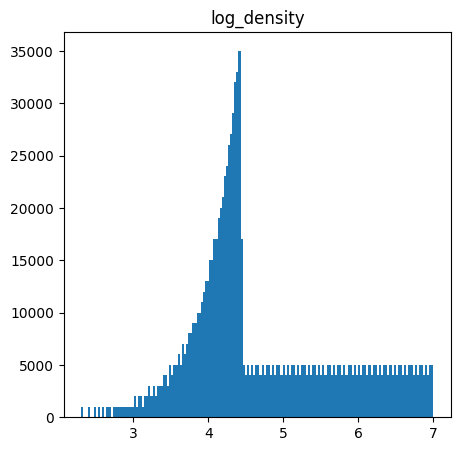

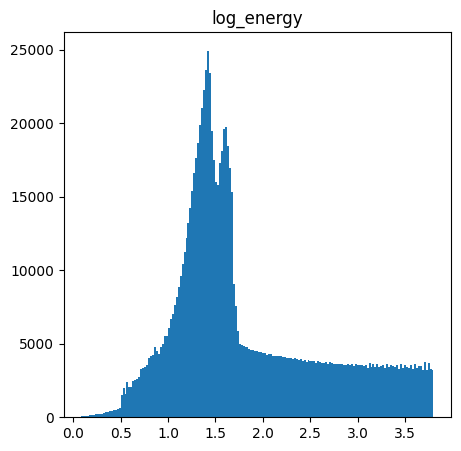

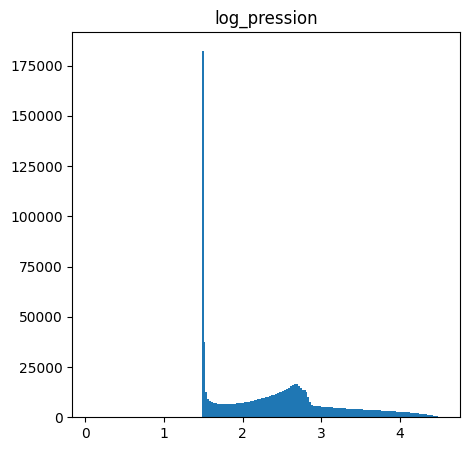

In [629]:
bins='auto'
attributes=["density","energy","pression"]
for atr in attributes:
    plt.figure("log_"+atr, figsize=(5,5))
    plt.title("log_"+atr)
    dataTest["log_"+atr]=np.log10(dataTest[atr]+1.1)
    plt.hist(dataTest["log_"+atr],bins=bins)
plt.show()

In [632]:
hist,nb = np.histogram(dataTrain['log_pression'],bins=10)

In [633]:
10**(nb)-1.1+minimums[4]

array([-2.99465261e+01, -2.76987183e+01, -2.14630973e+01, -4.16492343e+00,
        4.38217672e+01,  1.76941165e+02,  5.46226352e+02,  1.57065669e+03,
        4.41251862e+03,  1.22960993e+04,  3.41658615e+04])

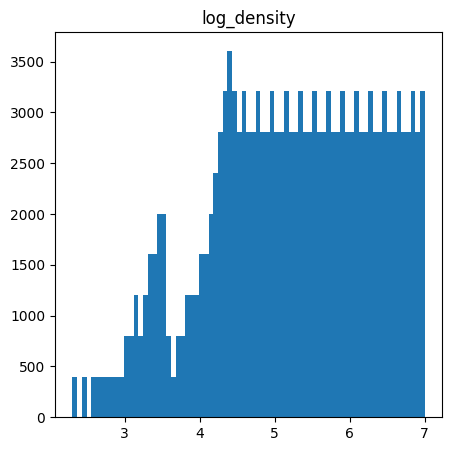

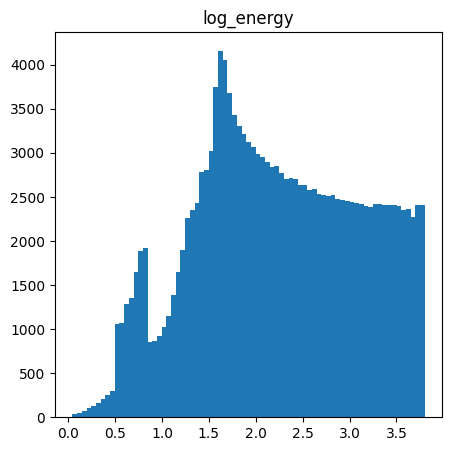

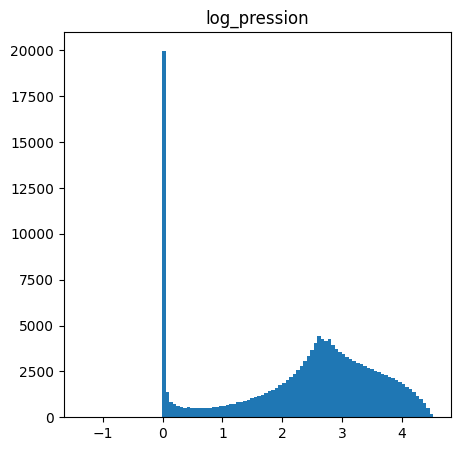

In [71]:
bins='auto'
attributes=["density","energy","pression"]
for atr in attributes:
    plt.figure("log_"+atr, figsize=(5,5))
    plt.title("log_"+atr)
    dataOther["log_"+atr]=np.log10(dataOther[atr]+1)
    plt.hist(dataOther["log_"+atr],bins=bins)
plt.show()

# Split and Save Data

In [12]:
Y_train=dataTrain[['log_energy',"log_pression"]]
X_train=dataTrain[["log_density","temperature"]]

Y_test=dataTest[['log_energy',"log_pression"]]
X_test=dataTest[["log_density","temperature"]]

In [13]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
transformer = MinMaxScaler().fit(X_train)
transformerY = MinMaxScaler().fit(Y_train)

In [15]:
X_train_prepared = transformer.transform(X_train)
X_test_prepared = transformer.transform(X_test)
Y_train_prepared = transformerY.transform(Y_train)
Y_test_prepared = transformerY.transform(Y_test)

In [16]:
X_train_prepared.shape

(145530, 2)

In [17]:
X_test_prepared.shape

(1001000, 2)

minimum:  0.0
maximum:  1.0
minimum:  0.0
maximum:  1.0


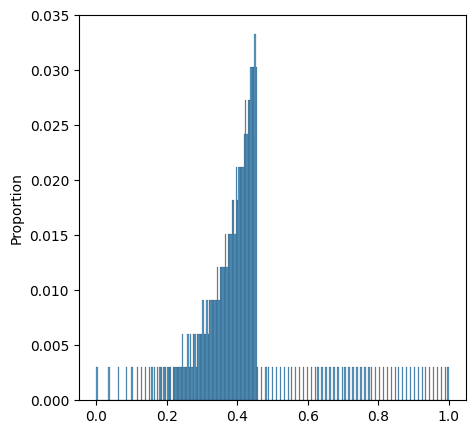

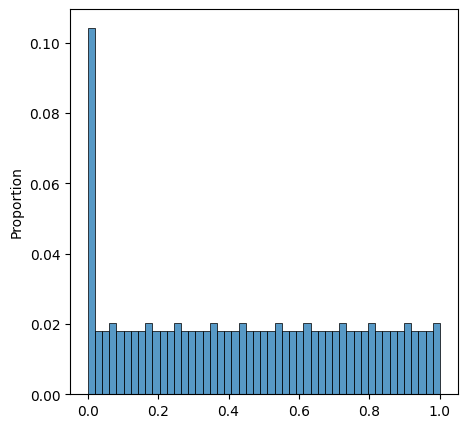

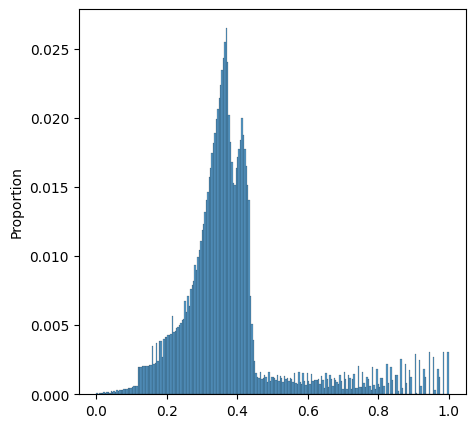

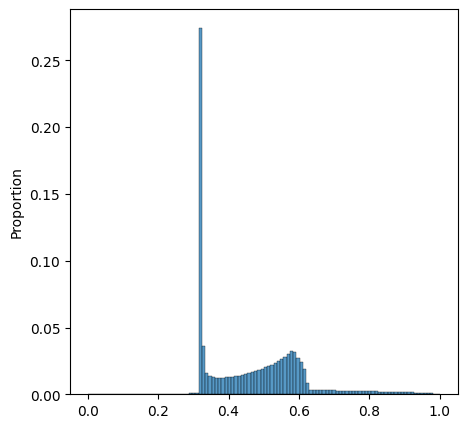

In [18]:
vis=X_train_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_train_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

minimum:  0.0
maximum:  1.0
minimum:  -0.010096817755750208
maximum:  1.0


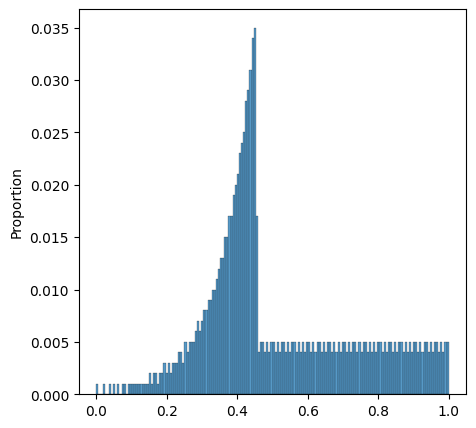

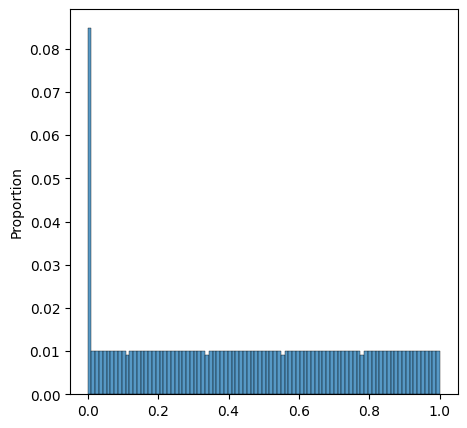

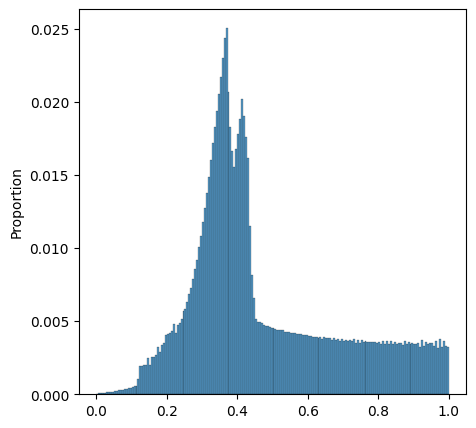

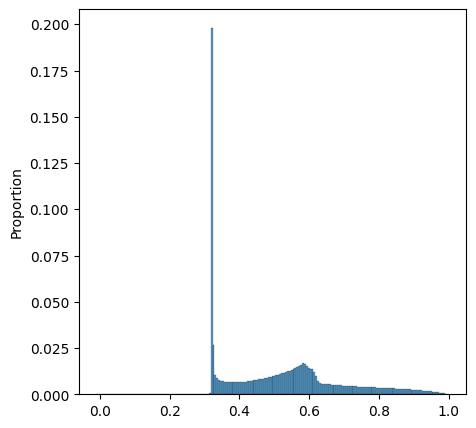

In [22]:
vis=X_test_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_test_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

In [18]:
np.savetxt('eqn_inputs_train.csv', X_train_prepared, delimiter=",")
np.savetxt('eqn_outputs_train.csv', Y_train_prepared, delimiter=",")
np.savetxt('eqn_inputs_test.csv', X_test_prepared, delimiter=",")
np.savetxt('eqn_outputs_test.csv', Y_test_prepared, delimiter=",")

# Box Cox Mapping

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [25]:
Y_train=dataTrain[['energy',"pression"]]
X_train=dataTrain[["density","temperature"]]

Y_test=dataTest[['energy',"pression"]]
X_test=dataTest[["density","temperature"]]

In [26]:
transformerX = PowerTransformer(method='box-cox').fit(X_train)
transformerY = PowerTransformer(method='box-cox').fit(Y_train)

In [27]:
X_train_prepared = transformerX.transform(X_train)
X_test_prepared = transformerX.transform(X_test)
Y_train_prepared = transformerY.transform(Y_train)
Y_test_prepared = transformerY.transform(Y_test)

minimum:  -4.127178353208689
maximum:  2.545475200697608
minimum:  -11.63251510981143
maximum:  2.602987544238289


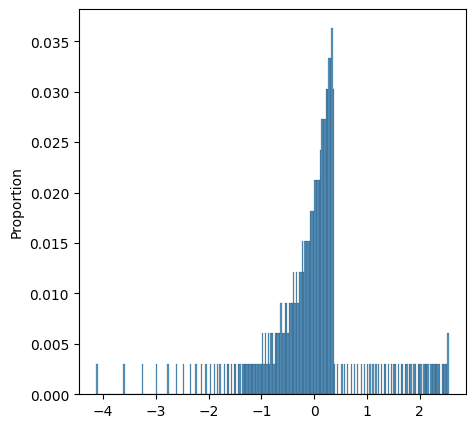

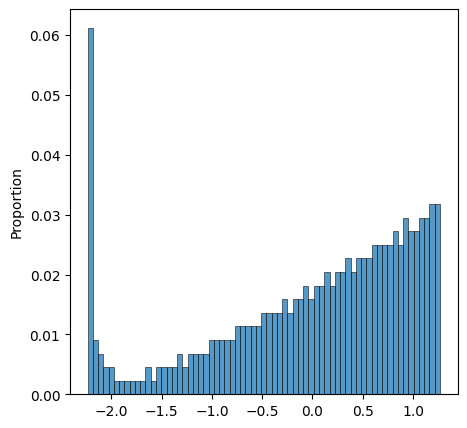

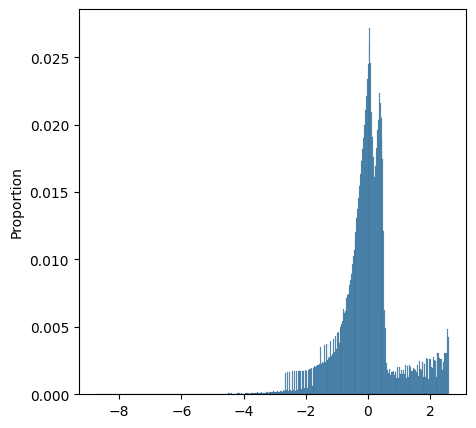

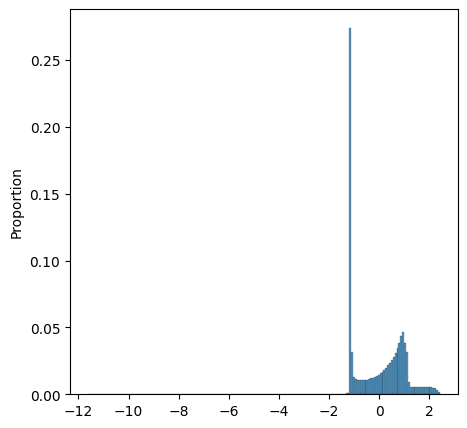

In [28]:
vis=X_train_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_train_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

minimum:  -4.127178353208689
maximum:  2.545475200697608
minimum:  -16.300011327649553
maximum:  2.602987544238289


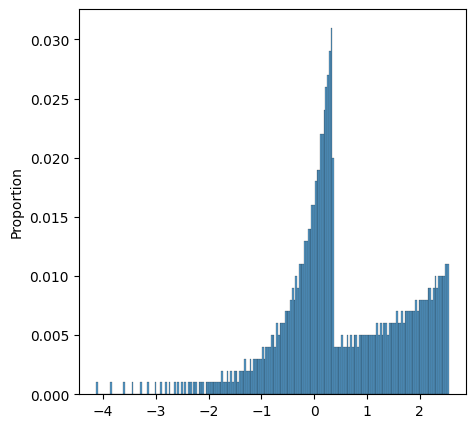

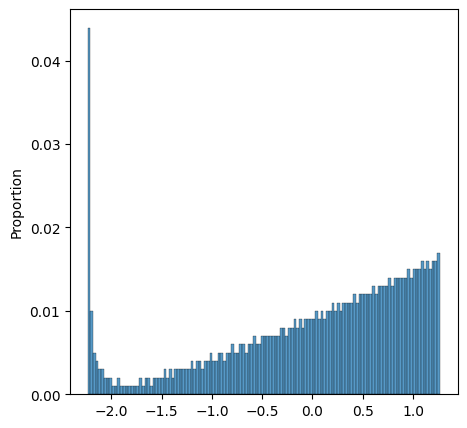

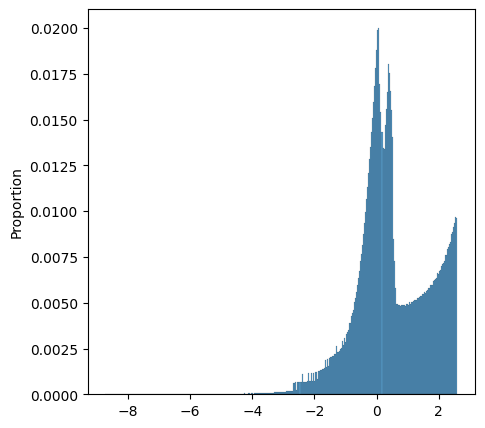

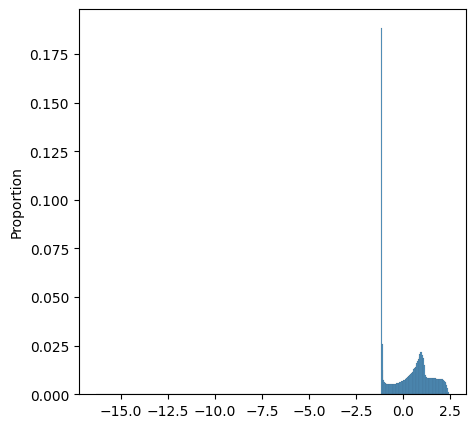

In [29]:
vis=X_test_prepared
for i in range(2):
    plt.figure(str(i), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

vis=Y_test_prepared
for i in range(2):
    plt.figure(str(i+2), figsize=(5,5))
    sns.histplot(vis[:,i],stat="proportion")
print("minimum: ", np.min(vis))
print("maximum: ", np.max(vis))

# Train a feed forward neural network

In [19]:
import keras
from keras import models
from keras import layers
from keras import initializers

import time

2022-10-12 13:26:03.094901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 13:26:03.193718: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-12 13:26:03.196983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 13:26:03.196993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [20]:
def init_Bengio(n,m,seed):
    a=-np.sqrt(6/(n+m)); b=-a
    return initializers.RandomUniform(minval=a,maxval=b,seed=seed)

In [30]:
def build_model(seed, loss, opt):
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='tanh', input_shape=(2,), kernel_initializer=init_Bengio(64,2,seed),
    bias_initializer=initializers.Zeros()))
    model.add(layers.Dense(64, activation='tanh', input_shape=(2,), kernel_initializer=init_Bengio(64,64,seed),
    bias_initializer=initializers.Zeros()))
    model.add(layers.Dense(2, activation='linear',kernel_initializer=init_Bengio(2,64,seed),
    bias_initializer=initializers.Zeros()))
    
    model.compile(loss=loss, metrics=['mae'], optimizer=opt)
    return model

In [31]:
opt = keras.optimizers.Adam()
loss='mse'
num_epochs = 100
seed=1
batch_size = X_train_prepared.shape[0]
t1 = time.process_time()
model = build_model(seed,loss,opt)

# Train the model (in silent mode, verbose=0)
history = model.fit(X_train_prepared, Y_train_prepared, epochs=num_epochs, batch_size=batch_size, verbose=0)
# Evaluate the model on the test data
val_mse, val_mae = model.evaluate(X_test_prepared, Y_test_prepared, verbose=0)
t2 = time.process_time()
print("temps Adam TensorFlow: ", t2-t1, " s")

temps Adam TensorFlow:  61.50086667400001  s


In [35]:
print('val mse final: ', val_mse)
print('val mae final: ', val_mae)

val mse final:  0.003642864990979433
val mae final:  0.043095022439956665
[array([[ 2.39450350e-01, -3.68106812e-02,  7.31741339e-02,
        -5.16064987e-02, -1.61063328e-01, -5.05281575e-02,
        -1.09294794e-01,  1.78391859e-01, -2.58224517e-01,
         1.76638290e-01, -3.12851042e-01, -2.25719698e-02,
        -8.52368772e-03, -1.78243056e-01,  2.67333388e-01,
        -5.74411303e-02, -2.44859800e-01, -1.17526844e-01,
        -2.63555408e-01, -6.64870515e-02, -6.14088140e-02,
        -9.65785757e-02,  6.49282336e-02, -2.17724293e-02,
        -2.79537775e-02,  9.88579541e-02,  1.86522007e-02,
        -6.38309121e-02,  2.38255877e-02,  5.47538102e-02,
        -1.85931232e-02,  1.43769965e-01,  1.88064918e-01,
        -2.57726848e-01,  7.00213909e-02,  2.14818820e-01,
        -1.99972838e-01, -2.82734871e-01,  1.43190950e-01,
        -8.74754786e-02,  2.69696295e-01,  1.37491748e-01,
         1.77454755e-01, -6.40027523e-02, -1.21133693e-01,
         2.73113459e-01,  2.69212693e-01

# Writing LC_EGD in Keras

In [108]:
import keras
import tensorflow as tf
import copy
import matplotlib.pyplot as plt

In [112]:
# Instantiate an optimizer (an update rule)
seed=1
optimizer = keras.optimizers.SGD()
# Instantiate a loss function.
loss_fn = keras.losses.MeanSquaredError()

#create the model
model = build_model(seed,loss_fn,optimizer); model_copy = build_model(seed,loss_fn,optimizer)

# Batch_size
batch_size = X_train_prepared.shape[0]

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_prepared, Y_train_prepared))
train_dataset = train_dataset.shuffle(buffer_size=batch_size).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_test_prepared, Y_test_prepared))
val_dataset = val_dataset.batch(batch_size)

In [113]:
train_acc_metric = keras.metrics.MeanAbsoluteError()
val_acc_metric = keras.metrics.MeanAbsoluteError()

In [116]:
def LC_EGD(eps, max_epochs, lr=0.1, f1=2, f2=10000, lambd=0.5):
    costs=[]
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    norme_grad=1000; epoch=0
    while(norme_grad>eps and epoch<max_epochs):
        start_time = time.time()

        # Iterate over the batches of the dataset.
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            if(epoch==0):
                # Open a GradientTape to record the operations run
                # during the forward pass, which enables auto-differentiation.
                with tf.GradientTape() as tape:

                    # Run the forward pass of the layer.
                    # The operations that the layer applies
                    # to its inputs are going to be recorded
                    # on the GradientTape.
                    prediction = model(x_batch_train, training=True)  # Logits for this minibatch

                    # Compute the loss value for this minibatch.
                    cost = loss_fn(y_batch_train, prediction)
                    print("cost_init: ", cost); costs.append(cost)

                    # Use the gradient tape to automatically retrieve
                    # the gradients of the trainable variables with respect to the loss.
                    grads = tape.gradient(cost, model.trainable_weights)
                    norme_grad = tf.linalg.global_norm(grads); V_dot = norme_grad**2
                    if(norme_grad<eps):
                        break;

            # Run one step of gradient descent by updating
            # the value of the variables to minimize the loss.

            cost_prec = cost
            model_copy.set_weights(model.get_weights())
            condition=True
            iterLoop=0
            while(condition):
                optimizer.apply_gradients(zip(grads, model.trainable_weights))
                with tf.GradientTape() as tape:
                    prediction = model(x_batch_train, training=True)  # Logits for this minibatch
                    cost = loss_fn(y_batch_train, prediction)
                condition = cost-cost_prec>-lambd*lr*V_dot
                if(condition):
                    lr/=f1; optimizer.learning_rate=lr
                    model.set_weights(model_copy.get_weights())
                iterLoop+=1
            #print(iterLoop)
            lr*=f2; optimizer.learning_rate=lr
            costs.append(cost)

            grads = tape.gradient(cost, model.trainable_weights)
            norme_grad= tf.linalg.global_norm(grads); V_dot=norme_grad**2
            
            epoch+=1

            if epoch % 100 == 0:
                print("\nStart of epoch %d" % (epoch,))
                print(
                    "Training loss (for one batch) at epoch %d: %.4f"
                    % (epoch, float(cost))
                )
                #print("Seen so far: %s samples" % ((step + 1) * batch_size))
    print("epochs: ", epoch)
    print("grad_norm: ", norme_grad)
    plt.plot(range(epoch+1), costs)

cost_init:  tf.Tensor(0.0020771837, shape=(), dtype=float32)

Start of epoch 100
Training loss (for one batch) at epoch 100: 0.0017
epochs:  100
grad_norm:  tf.Tensor(0.0013922339, shape=(), dtype=float32)
temps LC_EGD TensorFlow:  67.615251038  s


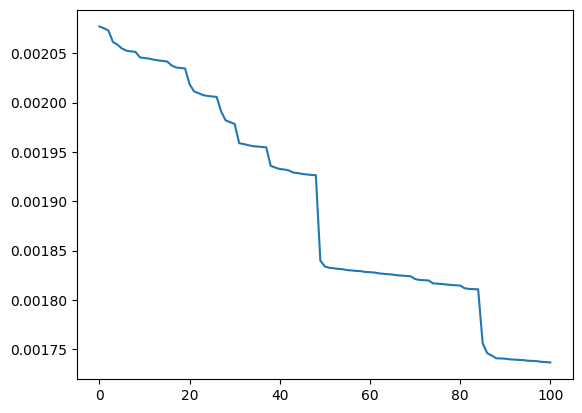

In [117]:
eps=10**(-3); max_epochs=100
lr_init=0.1; f1=5; f2=10000; lambd=0.5

t1=time.process_time()
LC_EGD(eps, max_epochs, lr_init, f1, f2, lambd)
t2=time.process_time()
print("temps LC_EGD TensorFlow: ", t2-t1, " s")

In [76]:
val_mse, val_mae = model.evaluate(X_test_prepared, Y_test_prepared, verbose=0)
print('val mse final: ', val_mse)
print('val mae final: ', val_mae)

val mse final:  0.001822451245971024
val mae final:  0.027497291564941406
